<a href="https://colab.research.google.com/github/sabaakram539/Visualization_and_Analytics/blob/main/Visualization_and_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the data and doing early preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
customer=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",0)
customer.head()

,Customer ID,Customer Name,Customer Address,Customer City,Customer State,Customer Zip,Sales Rep
0,386423,Big Mart,56 Hanover Dr,Boston,MA,2115,gray74
1,686236,Mastro Toys,12 2nd St,New York,NY,10022,gray74
2,874239,Toy Town,350 Hazel Ave,Atlanta,GA,31324,tanderson
3,469752,Toronto Toy Land,4 Main St,Minneapolis,MN,55416,mflemming17
4,456987,UniMart,12 State St,Newark,NJ,7191,gray74


**Removing unimportant variable**

In [ ]:
customer=customer.drop(['Customer Name',"Customer Address",'Customer Zip'],axis=1)
customer.head(2)

,Customer ID,Customer City,Customer State,Sales Rep
0,386423,Boston,MA,gray74
1,686236,New York,NY,gray74


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     100 non-null    int64 
 1   Customer City   100 non-null    object
 2   Customer State  100 non-null    object
 3   Sales Rep       100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [ ]:
employee=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",1)
employee.head(2)

,Employee ID,User ID,Employee Name,Hire Date,Termination Date,Work Location,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Approval Level,Salary Amount,Hourly Amount,Type,Pay Frequency,Bonus
0,728212,anderson21,Anderson,2012-07-18,NaN,100,Sales Representative,D,2012-10-16,D,2012-09-16,NaN,70000.0,NaN,Salary,1st and 15th,0.1
1,530855,baker50,Baker,2005-02-08,NaN,100,Human Resources Director,C,2005-05-09,B,2005-04-09,NaN,140000.0,NaN,Salary,1st and 15th,0.2


In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee ID         100 non-null    int64         
 1   User ID             100 non-null    object        
 2   Employee Name       100 non-null    object        
 3   Hire Date           100 non-null    datetime64[ns]
 4   Termination Date    0 non-null      float64       
 5   Work Location       100 non-null    int64         
 6   Job Title           100 non-null    object        
 7   Medical Plan        100 non-null    object        
 8   Medical Start Date  100 non-null    datetime64[ns]
 9   Savings Plan        100 non-null    object        
 10  Savings Start Date  100 non-null    datetime64[ns]
 11  Approval Level      0 non-null      float64       
 12  Salary Amount       41 non-null     float64       
 13  Hourly Amount       59 non-null     float64       


In [ ]:
employee.isnull().sum()

Employee ID             0
User ID                 0
Employee Name           0
Hire Date               0
Termination Date      100
Work Location           0
Job Title               0
Medical Plan            0
Medical Start Date      0
Savings Plan            0
Savings Start Date      0
Approval Level        100
Salary Amount          59
Hourly Amount          41
Type                    0
Pay Frequency           0
Bonus                   0
dtype: int64

We have no any values in 'Termination Date' and 'Approval level'. Let's drop them. and other unnecessary variable.

**Removing unnecessary column**

In [ ]:
employee=employee.drop(['User ID','Employee Name','Termination Date','Approval Level'],axis=1)
employee.head(2)

,Employee ID,Hire Date,Work Location,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Hourly Amount,Type,Pay Frequency,Bonus
0,728212,2012-07-18,100,Sales Representative,D,2012-10-16,D,2012-09-16,70000.0,NaN,Salary,1st and 15th,0.1
1,530855,2005-02-08,100,Human Resources Director,C,2005-05-09,B,2005-04-09,140000.0,NaN,Salary,1st and 15th,0.2


In [ ]:
employee=employee.rename(columns={'Work Location':"Location ID"})

In [ ]:
finished_good=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",2)
finished_good.head(2)

,Location ID,Detailed Location ID,Finished Item #,Description,Quantity,Date Received,Min Level,On-hold
0,600,New York Store,101,Sally Doll,700,2017-03-15,200.0,yes
1,500,Sao Paolo Plant,101,Sally Doll,400,2017-03-27,NaN,no


In [ ]:
finished_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Location ID           100 non-null    int64         
 1   Detailed Location ID  100 non-null    object        
 2   Finished Item #       100 non-null    int64         
 3   Description           100 non-null    object        
 4   Quantity              100 non-null    int64         
 5   Date Received         100 non-null    datetime64[ns]
 6   Min Level             20 non-null     float64       
 7   On-hold               100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 6.4+ KB


**Dropping unnecessay columns**

In [ ]:
finished_good=finished_good.drop(['Finished Item #','Min Level'],axis=1)# min level has 20 % missing values.

In [ ]:
finished_good.head(2)

,Location ID,Detailed Location ID,Description,Quantity,Date Received,On-hold
0,600,New York Store,Sally Doll,700,2017-03-15,yes
1,500,Sao Paolo Plant,Sally Doll,400,2017-03-27,no


In [ ]:
formula=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",3)
formula.head(2)

,Formula,Raw Material #1,#1 Quantity,Raw Material #2,#2 Quantity,Raw Material #3,#3 Quantity,Raw Material #4,#4 Quantity,Raw Material #5,#5 Quantity,Finished Good #
0,Red Car,131,4,132,2,133,4,134.0,4.0,570.0,1.0,211
1,Green Car,131,4,132,2,133,4,134.0,4.0,573.0,1.0,212


In [ ]:
formula['Raw Material #4']=formula['Raw Material #4'].fillna(formula['Raw Material #4'].mean())
formula['#4 Quantity']=formula['#4 Quantity'].fillna(formula['#4 Quantity'].mean())

In [ ]:
formula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Formula          20 non-null     object 
 1   Raw Material #1  20 non-null     int64  
 2   #1 Quantity      20 non-null     int64  
 3   Raw Material #2  20 non-null     int64  
 4   #2 Quantity      20 non-null     int64  
 5   Raw Material #3  20 non-null     int64  
 6   #3 Quantity      20 non-null     int64  
 7   Raw Material #4  20 non-null     float64
 8   #4 Quantity      20 non-null     float64
 9   Raw Material #5  10 non-null     float64
 10  #5 Quantity      10 non-null     float64
 11  Finished Good #  20 non-null     int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 2.0+ KB


**Removing Raw material #5 and #5 Quantity because of 50% null value**

In [ ]:
formula=formula.drop(['Raw Material #5','#5 Quantity'],axis=1)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


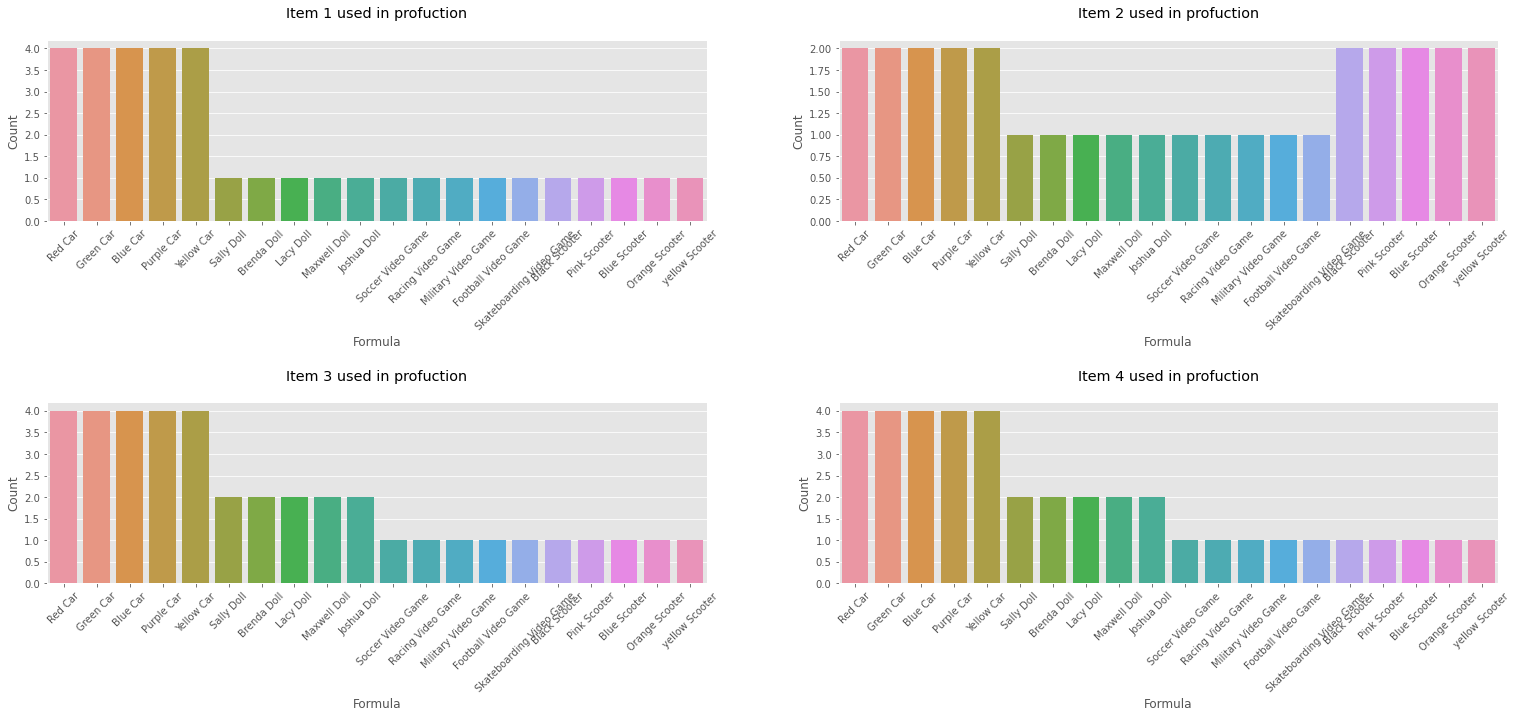

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(26,10))
plt.style.use('ggplot')
plt.subplots_adjust(hspace=1)
sns.barplot(formula['Formula'],formula['#1 Quantity'],ax=ax[0,0])
ax[0,0].set_title("Item 1 used in profuction\n")
ax[0,0].set_xlabel("Formula")
ax[0,0].set_ylabel("Count")
plt.setp(ax[0,0].get_xticklabels(),rotation=45)
plt.setp(ax[0,0].get_yticklabels())

sns.barplot(formula['Formula'],formula['#2 Quantity'],ax=ax[0,1])
ax[0,1].set_title("Item 2 used in profuction\n")
ax[0,1].set_xlabel("Formula")
ax[0,1].set_ylabel("Count")
plt.setp(ax[0,1].get_xticklabels(),rotation=45)
plt.setp(ax[0,1].get_yticklabels())

sns.barplot(formula['Formula'],formula['#3 Quantity'],ax=ax[1,0])
ax[1,0].set_title("Item 3 used in profuction\n")
ax[1,0].set_xlabel("Formula")
ax[1,0].set_ylabel("Count")
plt.setp(ax[1,0].get_xticklabels(),rotation=45)
plt.setp(ax[1,0].get_yticklabels())

sns.barplot(formula['Formula'],formula['#3 Quantity'],ax=ax[1,1])
ax[1,1].set_title("Item 4 used in profuction\n")
ax[1,1].set_xlabel("Formula")
ax[1,1].set_ylabel("Count")
plt.setp(ax[1,1].get_xticklabels(),rotation=45)
plt.setp(ax[1,1].get_yticklabels())


plt.show()

In [ ]:
formula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Formula          20 non-null     object 
 1   Raw Material #1  20 non-null     int64  
 2   #1 Quantity      20 non-null     int64  
 3   Raw Material #2  20 non-null     int64  
 4   #2 Quantity      20 non-null     int64  
 5   Raw Material #3  20 non-null     int64  
 6   #3 Quantity      20 non-null     int64  
 7   Raw Material #4  20 non-null     float64
 8   #4 Quantity      20 non-null     float64
 9   Finished Good #  20 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.7+ KB


In [ ]:
inventory_count=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",4)
inventory_count

,Date of Count,Location,Detailed Location,Item #,Minimum Quanitity,Quantity Counted,Quantity Expected,Difference,Counter,Approver
0,2017-03-14,600,Distribution Center,101,NaN,700,700,0,jones74,smith24
1,2017-03-14,600,Distribution Center,102,NaN,430,430,0,jones74,smith24
2,2017-03-14,600,Distribution Center,103,NaN,400,400,0,jones74,smith24
3,2017-03-14,600,Distribution Center,104,NaN,500,500,0,jones74,smith24
4,2017-03-14,600,Distribution Center,105,NaN,540,450,0,jones74,smith24
...,...,...,...,...,...,...,...,...,...,...
199,2017-03-14,500,Sao Paolo Plant,401,NaN,300,300,0,santos11,lopez22
200,2017-03-14,500,Sao Paolo Plant,402,NaN,200,200,0,santos11,lopez22
201,2017-03-14,500,Sao Paolo Plant,403,NaN,300,300,0,santos11,lopez22
202,2017-03-14,500,Sao Paolo Plant,404,NaN,350,350,0,santos11,lopez22


In [ ]:
inventory_count=inventory_count.rename(columns={'Location':'Location ID'})

In [ ]:
inventory_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date of Count      204 non-null    datetime64[ns]
 1   Location ID        204 non-null    int64         
 2   Detailed Location  204 non-null    object        
 3   Item #             204 non-null    int64         
 4   Minimum Quanitity  104 non-null    float64       
 5   Quantity Counted   204 non-null    int64         
 6   Quantity Expected  204 non-null    int64         
 7   Difference         204 non-null    int64         
 8   Counter            204 non-null    object        
 9   Approver           204 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 16.1+ KB


**Removing Unnecessary variable**

In [ ]:
inventory_count=inventory_count.drop(['Date of Count','Minimum Quanitity'],axis=1) # 50% of minimum quantity is missing, therefore needs to be removed.

In [ ]:
inventory_count.head(2)

,Location ID,Detailed Location,Item #,Quantity Counted,Quantity Expected,Difference,Counter,Approver
0,600,Distribution Center,101,700,700,0,jones74,smith24
1,600,Distribution Center,102,430,430,0,jones74,smith24


In [ ]:
inventory_count[inventory_count['Difference']!=0].shape

(30, 8)

In [ ]:
inventory_adjustment=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",5)
inventory_adjustment

,Date,Location,Detailed Location,Raw Material #,Finished Goods #,Adjustment,Adjustment Reason,Approver
0,2017-03-15,600,Distribution Center,NaN,211.0,NaN,NaN,smith24
1,2017-03-15,600,Distribution Center,NaN,303.0,NaN,NaN,smith24
2,2017-03-15,600,Distribution Center,NaN,305.0,NaN,NaN,smith24
3,2017-03-15,600,Distribution Center,NaN,403.0,NaN,NaN,smith24
4,2017-03-15,600,Distribution Center,NaN,404.0,NaN,NaN,smith24
5,2017-03-15,600,Distribution Center,NaN,405.0,NaN,NaN,smith24
6,2017-03-15,500,Sao Paolo Plant,134.0,NaN,NaN,NaN,lopez22
7,2017-03-15,500,Sao Paolo Plant,253.0,NaN,NaN,NaN,lopez22
8,2017-03-15,500,Sao Paolo Plant,256.0,NaN,NaN,NaN,lopez22
9,2017-03-15,500,Sao Paolo Plant,322.0,NaN,NaN,NaN,lopez22


In [ ]:
inventory_adjustment=inventory_adjustment.rename(columns={'Location':"Location ID"})

In [ ]:
inventory_adjustment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               30 non-null     datetime64[ns]
 1   Location ID        30 non-null     int64         
 2   Detailed Location  30 non-null     object        
 3   Raw Material #     24 non-null     float64       
 4   Finished Goods #   6 non-null      float64       
 5   Adjustment         0 non-null      float64       
 6   Adjustment Reason  0 non-null      float64       
 7   Approver           30 non-null     object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.0+ KB


In [ ]:
inventory_adjustment['Detailed Location'].value_counts()

Shanghai Plant         6
Distribution Center    6
Washington Plant       6
Sao Paolo Plant        6
Mexico City Plant      6
Name: Detailed Location, dtype: int64

In [ ]:
inventory_adjustment['Raw Material #']=inventory_adjustment['Raw Material #'].fillna(inventory_adjustment['Raw Material #'].mean())

**Removing Unnecessary variables**

In [ ]:
inventory_adjustment=inventory_adjustment.drop(['Adjustment','Adjustment Reason','Finished Goods #'],axis=1) # Both adjustment and adjustment reason values are missing totally
inventory_adjustment.head(2)

,Date,Location ID,Detailed Location,Raw Material #,Approver
0,2017-03-15,600,Distribution Center,326.5,smith24
1,2017-03-15,600,Distribution Center,326.5,smith24


In [ ]:
invoice=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",6)
invoice

,Invoice #,Vendor #,Invoice Date,Item,Item Quantity,Item Cost,Extended Cost,Freight Cost,Total Cost,Processor ID,Associated PO,Associated Receipt,Payment Terms,Discount
0,74562,321782506,2017-03-08,131,100,15,1500,200,1700,feng42,323205,774805,Net 60,none
1,21775,658314729,2017-03-08,132,50,15,750,100,850,feng42,405605,665014,Net 15,0.05
2,65075,658314729,2017-03-14,133,50,15,750,100,850,feng42,650351,205068,Net 15,0.05
3,54055,504796147,2017-03-14,134,50,15,750,100,850,feng42,795652,700656,Net 10,0.05
4,30892,640498345,2017-03-08,250,200,20,4000,400,4400,feng42,749207,985084,Net 60,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,75418,508089512,2017-03-15,573,500,10,5000,1000,6000,schmitz62,906530,335823,Net 10,none
100,65070,842895157,2017-03-15,574,500,10,5000,1000,6000,schmitz62,856065,650456,Net 30,none
101,86075,508089512,2017-03-15,575,750,10,7500,1500,9000,schmitz62,650472,608545,Net 10,none
102,69962,658314729,2017-03-07,576,700,10,7000,1400,8400,schmitz62,305652,708504,Net 15,0.05


In [ ]:
invoice=invoice.rename(columns={"Associated PO":"PO #"})

In [ ]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Invoice #           104 non-null    int64         
 1   Vendor #            104 non-null    int64         
 2   Invoice Date        104 non-null    datetime64[ns]
 3   Item                104 non-null    int64         
 4   Item Quantity       104 non-null    int64         
 5   Item Cost           104 non-null    int64         
 6   Extended Cost       104 non-null    int64         
 7   Freight Cost        104 non-null    int64         
 8   Total Cost          104 non-null    int64         
 9   Processor ID        104 non-null    object        
 10  PO #                104 non-null    int64         
 11  Associated Receipt  104 non-null    int64         
 12  Payment Terms       104 non-null    object        
 13  Discount            104 non-null    object        

**Removing Unnecessary variables**

In [ ]:
invoice=invoice.drop(['Invoice Date'],axis=1)

In [ ]:
invoice.head(2)

,Invoice #,Vendor #,Item,Item Quantity,Item Cost,Extended Cost,Freight Cost,Total Cost,Processor ID,PO #,Associated Receipt,Payment Terms,Discount
0,74562,321782506,131,100,15,1500,200,1700,feng42,323205,774805,Net 60,none
1,21775,658314729,132,50,15,750,100,850,feng42,405605,665014,Net 15,0.05


In [ ]:
location=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",7)
location

,Location ID,Location Name,Country,Type
0,100,Cleveland,USA,Headquarters
1,200,Washington,USA,Plant
2,300,Shanghai,China,Plant
3,400,Mexico City,Mexico,Plant
4,500,Sao Paulo,Brazil,Plant
5,600,New York,USA,Store


In [ ]:
medical_plan=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",8)
medical_plan

,Medical Plan,Plan Description,Deductable
0,Medical A,Healthy Focus Individual Advantage Plan,400
1,Medical B,Healthy Focus Individual Essential Plan,200
2,Medical C,Healthy Focus Family Advantage Plan,400 per family member
3,Medical D,Healthy Focus Family Essential Plan,200 per family member
4,Medical E,Healty Focus Basic Plan,100


In [ ]:
medical_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Medical Plan      5 non-null      object
 1   Plan Description  5 non-null      object
 2   Deductable        5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


In [ ]:
medical_plan['Medical Plan']=medical_plan['Medical Plan'].str.split().str[1]

In [ ]:
medical_plan['Plan Description']=medical_plan['Plan Description'].str.split(" ").str[2:].str.join(",").str.replace(","," ")

In [ ]:
medical_plan['Deductable'][2]=400
medical_plan['Deductable'][3]=200

In [ ]:
medical_plan

,Medical Plan,Plan Description,Deductable
0,A,Individual Advantage Plan,400
1,B,Individual Essential Plan,200
2,C,Family Advantage Plan,400
3,D,Family Essential Plan,200
4,E,Basic Plan,100


In [ ]:
payment=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",9)
payment.head()

,Payment ID,Vendor,PO #,Receipt #,Invoice #,Payment Amount,Check #,Payment Type,Wire #,Payment Date,Processor ID
0,65405,321782506,323205.0,774805,74562,1700,1234.0,Check,NaN,2017-03-18,feng42
1,32344,658314729,405605.0,665014,21775,850,NaN,ACH,8399572.0,2017-03-18,feng42
2,21140,658314729,NaN,205068,65075,850,NaN,ACH,6682959.0,2017-03-24,feng42
3,89053,504796147,795652.0,700656,54055,850,8263.0,Check,NaN,2017-03-24,feng42
4,45541,640498345,749207.0,985084,30892,4400,NaN,ACH,3159304.0,2017-03-18,feng42


In [ ]:
payment.duplicated().sum()

0

In [ ]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Payment ID      104 non-null    int64         
 1   Vendor          104 non-null    int64         
 2   PO #            100 non-null    float64       
 3   Receipt #       104 non-null    int64         
 4   Invoice #       104 non-null    int64         
 5   Payment Amount  104 non-null    int64         
 6   Check #         30 non-null     float64       
 7   Payment Type    104 non-null    object        
 8   Wire #          74 non-null     float64       
 9   Payment Date    104 non-null    datetime64[ns]
 10  Processor ID    104 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 9.1+ KB


**Removing unnecessary variables**

In [ ]:
payment.drop(['Check #','Wire #'],axis=1,inplace=True)  # Check and Wire both have resonable number of missing values,needs to be dropped.

In [ ]:
payroll=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",10)
payroll.head(2)

,Pay Type,Date of Payment,Employee ID,Employee Type,Hours Worked,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
0,1st and 15th,2017-03-01,728212,Salary,NaN,2916.666667,400,58.333333,291.666667,7000.0,9166.666667
1,1st and 15th,2017-03-01,530855,Salary,NaN,5833.333333,800,233.333333,583.333333,28000.0,32216.666667


In [ ]:
payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Pay Type         100 non-null    object        
 1   Date of Payment  100 non-null    datetime64[ns]
 2   Employee ID      100 non-null    int64         
 3   Employee Type    100 non-null    object        
 4   Hours Worked     59 non-null     float64       
 5   Pay              100 non-null    float64       
 6   Medical          100 non-null    int64         
 7   Savings          100 non-null    float64       
 8   Tax (10%)        100 non-null    float64       
 9   Year End Bonus   23 non-null     float64       
 10  Total Pay        100 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 8.7+ KB


In [ ]:
purchase_order=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",11)
purchase_order.head(2)

,PO #,Location,Item,Description,Item Quantity,Unit Cost,Total Amount,Vendor #,Creator ID,Creation Date,Creation Time,Approver ID,Approver Date,Approver Time
0,323205,200,131,Toy Car Wheels,100,15,1500,321782506,gutierrez39,2017-03-08,05:50:00,young68,2017-03-09,04:05:00
1,405605,200,132,Toy Car Doors,50,15,750,658314729,gutierrez39,2017-03-08,12:08:00,young68,2017-03-09,03:40:00


In [ ]:
purchase_order=purchase_order.rename(columns={"Location":"Location ID"})

In [ ]:
purchase_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PO #           104 non-null    int64         
 1   Location ID    104 non-null    int64         
 2   Item           104 non-null    int64         
 3   Description    104 non-null    object        
 4   Item Quantity  104 non-null    int64         
 5   Unit Cost      104 non-null    int64         
 6   Total Amount   104 non-null    int64         
 7   Vendor #       104 non-null    int64         
 8   Creator ID     104 non-null    object        
 9   Creation Date  104 non-null    datetime64[ns]
 10  Creation Time  104 non-null    object        
 11  Approver ID    104 non-null    object        
 12  Approver Date  104 non-null    datetime64[ns]
 13  Approver Time  104 non-null    object        
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.5+ KB


In [ ]:
raw_mtrl_on_hand=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",12)
raw_mtrl_on_hand.head()

,Location ID,Detailed Location ID,Raw Item #,Description,Quantity,Date Received
0,200,Washington Plant,131,Toy Car Wheels,4000,2017-03-01
1,200,Washington Plant,132,Toy Car Doors,2000,2017-03-01
2,200,Washington Plant,133,Toy Car Window,4000,2017-03-01
3,200,Washington Plant,134,Toy Car Lights,2000,2017-03-01
4,200,Washington Plant,250,Doll Red Hair,300,2017-03-01


## **Quantity of different raw items**

In [ ]:
raw_mtrl_on_hand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Location ID           104 non-null    int64         
 1   Detailed Location ID  104 non-null    object        
 2   Raw Item #            104 non-null    int64         
 3   Description           104 non-null    object        
 4   Quantity              104 non-null    int64         
 5   Date Received         104 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 5.0+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

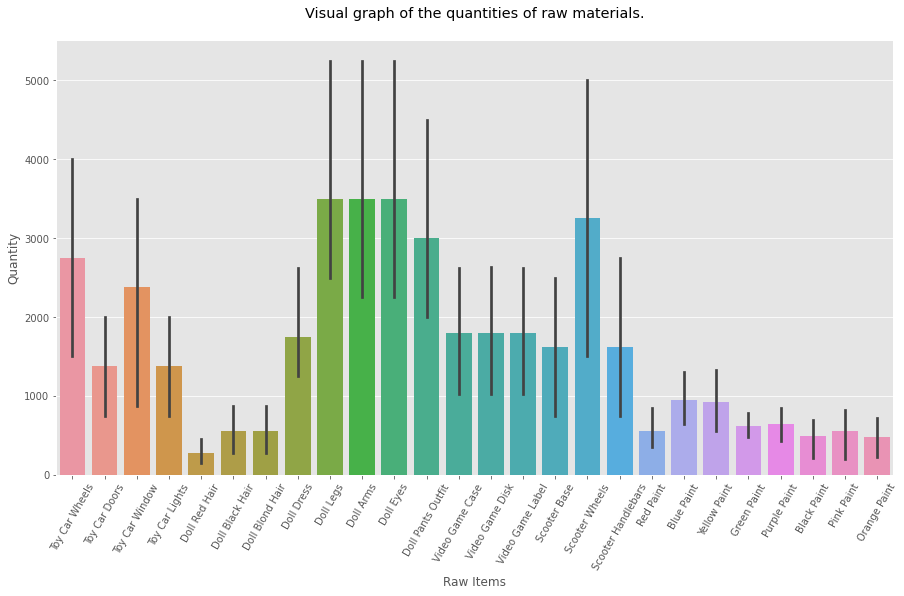

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(raw_mtrl_on_hand['Description'],raw_mtrl_on_hand['Quantity'])
plt.title("Visual graph of the quantities of raw materials.\n")
plt.xlabel("Raw Items")
plt.xticks(rotation=60)

In [ ]:
receipt=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",13)
receipt.head(2)

,Receipt ID,Location,Date,Time,Item #,Item Quantity,Truck #,Receiver ID,Vendor #,PO Number
0,774805,200,2017-03-15,09:04,131,100,1030,young68,321782506,323205
1,665014,200,2017-03-15,10:27,132,50,1186,young68,658314729,405605


In [ ]:
receipt=receipt.rename(columns={'Location':"Location ID"})

In [ ]:
receipt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Receipt ID     104 non-null    int64         
 1   Location ID    104 non-null    int64         
 2   Date           104 non-null    datetime64[ns]
 3   Time           104 non-null    object        
 4   Item #         104 non-null    int64         
 5   Item Quantity  104 non-null    int64         
 6   Truck #        104 non-null    int64         
 7   Receiver ID    104 non-null    object        
 8   Vendor #       104 non-null    int64         
 9   PO Number      104 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 8.2+ KB


In [ ]:
receipt=receipt.rename(columns={"PO Number":'PO #'})

In [ ]:
sales=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",14)
sales.head(2)

,Order ID,Order Date,Customer ID,Item #,Quantity,Price,Promotion,Freight,Total Price,Promised Date,Special Order,Approver ID,Approval Date,Shipped Date
0,297449.0,2017-03-07,686236.0,101.0,20,18.0,none,40.0,400.0,2017-04-07,yes,gray74,2017-03-10,2017-03-12
1,891809.0,2017-03-07,469752.0,101.0,100,18.0,none,200.0,2000.0,2017-04-07,no,davidson20,2017-03-13,2017-03-15


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       100 non-null    float64       
 1   Order Date     100 non-null    datetime64[ns]
 2   Customer ID    100 non-null    float64       
 3   Item #         100 non-null    float64       
 4   Quantity       101 non-null    object        
 5   Price          100 non-null    float64       
 6   Promotion      100 non-null    object        
 7   Freight        100 non-null    float64       
 8   Total Price    100 non-null    float64       
 9   Promised Date  100 non-null    datetime64[ns]
 10  Special Order  100 non-null    object        
 11  Approver ID    100 non-null    object        
 12  Approval Date  99 non-null     datetime64[ns]
 13  Shipped Date   100 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(6), object(4)
memory usage: 11.2+ KB


In [ ]:
saving_plan=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",15)
saving_plan

,Savings Plan,Plan Description,Percentage
0,Savings A,Supreme Savings Plan,5.0
1,Savings B,High Compensation Savings Plan,4.0
2,Savings C,Catch Up Savgings Plan,3.0
3,Savings D,Preferred Savings Plan,1.5
4,Savings E,Basic Savings Plan,1.0


In [ ]:
saving_plan['Savings Plan']=saving_plan['Savings Plan'].str.split(" ").str[1]

In [ ]:
saving_plan

,Savings Plan,Plan Description,Percentage
0,A,Supreme Savings Plan,5.0
1,B,High Compensation Savings Plan,4.0
2,C,Catch Up Savgings Plan,3.0
3,D,Preferred Savings Plan,1.5
4,E,Basic Savings Plan,1.0


In [ ]:
vendor=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",16)
vendor.head(2)

,Vendor ID,Vendor Name,Address,City,State,Zip,Billing Address,Billing City,Billing State,Billing Zip,Phone,Main Contact,Email,Payment Terms,Payment Method,Status,Status Change Date,Discount Level,Discount Period
0,658314729,Jefferson Group,4650 State Street,Los Angeles,CA,93544,4650 State Street,Los Angeles,CA,93544,213-951-4610,Huge Stephens,hstephens@jefferson.com,Net 15,ACH,good,2017-01-01,0.05,2017
1,842895157,TGE Inc.,15 South Street,Austin,TX,78704,15 South Street,Austin,TX,78704,512-605-4507,Lisa Roberts,lisa.roberts@tge.com,Net 30,Wire,good,2017-01-01,none,none


In [ ]:
vendor.drop(['Vendor Name','Address','Zip','Billing Address','Billing Zip','Phone','Main Contact','Email'],axis=1,inplace=True)

In [ ]:
vendor.head(2)

,Vendor ID,City,State,Billing City,Billing State,Payment Terms,Payment Method,Status,Status Change Date,Discount Level,Discount Period
0,658314729,Los Angeles,CA,Los Angeles,CA,Net 15,ACH,good,2017-01-01,0.05,2017
1,842895157,Austin,TX,Austin,TX,Net 30,Wire,good,2017-01-01,none,none


In [ ]:
vendor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Vendor ID           30 non-null     int64         
 1   City                30 non-null     object        
 2   State               30 non-null     object        
 3   Billing City        30 non-null     object        
 4   Billing State       30 non-null     object        
 5   Payment Terms       30 non-null     object        
 6   Payment Method      30 non-null     object        
 7   Status              30 non-null     object        
 8   Status Change Date  30 non-null     datetime64[ns]
 9   Discount Level      30 non-null     object        
 10  Discount Period     30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 2.7+ KB


In [ ]:
product_master=pd.read_excel("MITS6005-Major Assignment Fictional Project Data.xlsx",17)
product_master

,Finished Items,Description,Suggested Distributor Price,Unnamed: 3,Unnamed: 4
0,Black Scooter,Scooter superscoop board two wheel 250W Black,42.40,NaN,NaN
1,Blue Car,Remote control car electrical Blue,33.82,NaN,NaN
2,Blue Scooter,Scooter superscoop board two wheel 250W Blue,42.50,NaN,NaN
3,Brenda Doll,Fashion doll female blonde 18in,22.72,NaN,NaN
4,Football Video Game,2 Player Football HD,38.54,NaN,NaN
5,Green Car,Remote control car electrical Green,33.82,NaN,NaN
6,Joshua Doll,Fashion doll male brunette 18in,22.72,NaN,NaN
7,Lacy Doll,Fashion doll female red 18in,22.72,NaN,NaN
8,Maxwell Doll,Fashion doll male blonde 18in,22.72,NaN,NaN
9,Military Video Game,Multiplayer Military HD,43.22,NaN,NaN


In [ ]:
product_master.drop(['Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
product_master

,Finished Items,Description,Suggested Distributor Price
0,Black Scooter,Scooter superscoop board two wheel 250W Black,42.40
1,Blue Car,Remote control car electrical Blue,33.82
2,Blue Scooter,Scooter superscoop board two wheel 250W Blue,42.50
3,Brenda Doll,Fashion doll female blonde 18in,22.72
4,Football Video Game,2 Player Football HD,38.54
5,Green Car,Remote control car electrical Green,33.82
6,Joshua Doll,Fashion doll male brunette 18in,22.72
7,Lacy Doll,Fashion doll female red 18in,22.72
8,Maxwell Doll,Fashion doll male blonde 18in,22.72
9,Military Video Game,Multiplayer Military HD,43.22


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

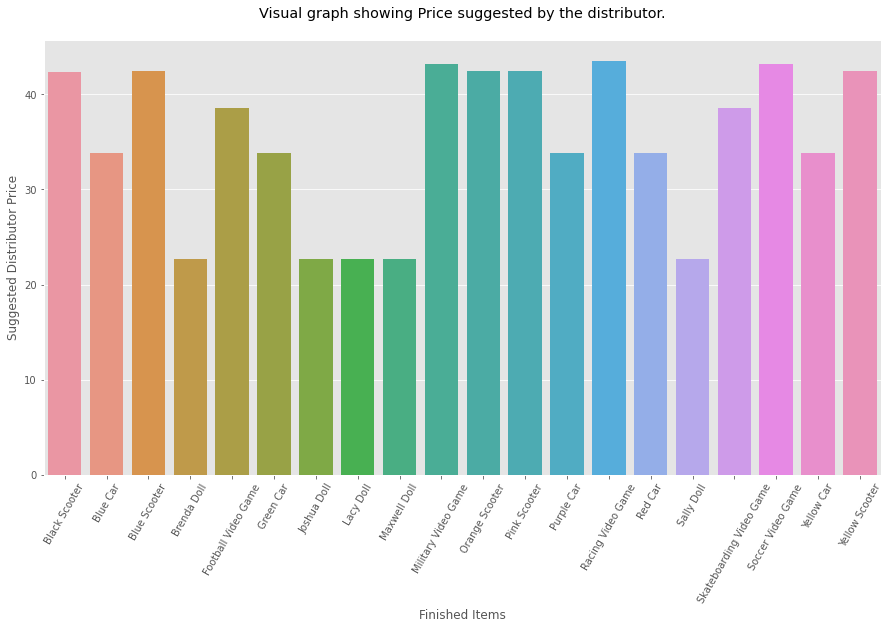

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(product_master['Finished Items'],product_master['Suggested Distributor Price'])
plt.title("Visual graph showing Price suggested by the distributor.\n")
plt.xticks(rotation=60)

# **Finding Insights**

>> ## **merging customer and sales over "Customer ID"**

In [ ]:
customer_and_sales=pd.merge(customer,sales,on='Customer ID')
customer_and_sales.head()

,Customer ID,Customer City,Customer State,Sales Rep,Order ID,Order Date,Item #,Quantity,Price,Promotion,Freight,Total Price,Promised Date,Special Order,Approver ID,Approval Date,Shipped Date
0,386423,Boston,MA,gray74,748962.0,2017-03-07,211.0,300,20.0,none,900.0,6900.0,2017-04-07,no,fleming82,2017-03-11,2017-03-13
1,686236,New York,NY,gray74,297449.0,2017-03-07,101.0,20,18.0,none,40.0,400.0,2017-04-07,yes,gray74,2017-03-10,2017-03-12
2,874239,Atlanta,GA,tanderson,160400.0,2017-03-07,302.0,150,25.0,none,150.0,3900.0,2017-04-07,no,allison29,2017-03-12,2017-03-14
3,469752,Minneapolis,MN,mflemming17,891809.0,2017-03-07,101.0,100,18.0,none,200.0,2000.0,2017-04-07,no,davidson20,2017-03-13,2017-03-15
4,456987,Newark,NJ,gray74,845636.0,2017-03-07,101.0,60,18.0,none,120.0,1200.0,2017-04-07,no,fleming82,2017-03-13,2017-03-18


In [ ]:
customer_and_sales.drop(['Customer ID','Order ID','Approver ID'],axis=1,inplace=True)

In [ ]:
customer_and_sales.head(2)

,Customer City,Customer State,Sales Rep,Order Date,Item #,Quantity,Price,Promotion,Freight,Total Price,Promised Date,Special Order,Approval Date,Shipped Date
0,Boston,MA,gray74,2017-03-07,211.0,300,20.0,none,900.0,6900.0,2017-04-07,no,2017-03-11,2017-03-13
1,New York,NY,gray74,2017-03-07,101.0,20,18.0,none,40.0,400.0,2017-04-07,yes,2017-03-10,2017-03-12


## **Calculating New Total Price and comparing with the old one to verify it**

In [ ]:
customer_and_sales['New Total Price']=((customer_and_sales['Quantity']*customer_and_sales['Price'])+customer_and_sales['Freight'])

In [ ]:
customer_and_sales['Price Difference']=customer_and_sales['Total Price']-customer_and_sales['New Total Price']

In [ ]:
customer_and_sales[customer_and_sales['Price Difference']!=0]

,Customer City,Customer State,Sales Rep,Order Date,Item #,Quantity,Price,Promotion,Freight,Total Price,Promised Date,Special Order,Approval Date,Shipped Date,New Total Price,Price Difference
7,Baltimore,MD,anderson21,2017-03-07,213.0,150,20.0,0.05,450.0,3277.5,2017-04-07,no,2017-03-10,2017-03-12,3450,-172.5
24,Dover,DE,anderson21,2017-03-10,301.0,150,25.0,0.05,150.0,3705.0,2017-04-10,no,2017-03-15,2017-03-17,3900,-195
41,Walhalla,ND,alves20,2017-03-11,104.0,75,18.0,0.05,150.0,1425.0,2017-04-11,no,2017-03-14,2017-03-16,1500,-75
47,Beaver,WV,smith75,2017-03-11,305.0,100,25.0,0.05,100.0,2470.0,2017-04-11,yes,2017-03-17,2017-03-21,2600,-130
75,Nashville,TN,guo10,2017-03-15,402.0,15,20.0,0.05,60.0,342.0,2017-04-15,yes,NaT,2017-04-01,360,-18
94,Pittsburgh,PA,gray74,2017-03-18,102.0,150,18.0,0.05,300.0,2850.0,2017-04-18,no,2017-03-22,2017-03-24,3000,-150


**We observe that that, in 6 cases we don,t have equal prices. Let's see it visually and observe it**

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

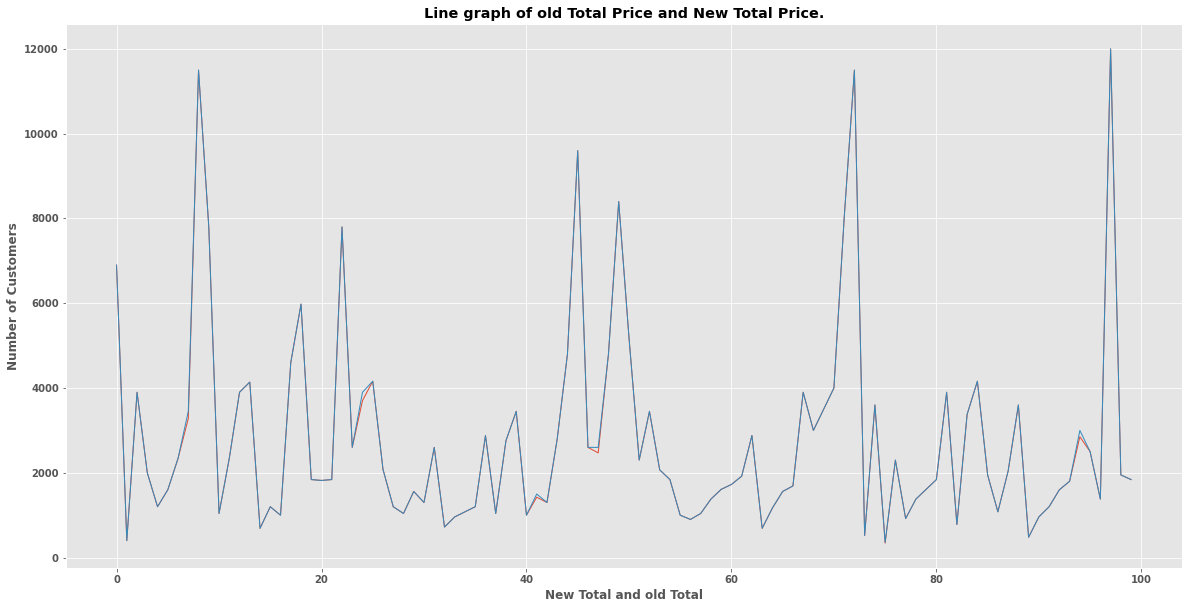

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(customer_and_sales['Total Price'],linewidth=1)
plt.plot(customer_and_sales['New Total Price'],linewidth=1)
plt.title("Line graph of old Total Price and New Total Price.", fontweight='bold')
plt.xlabel("New Total and old Total",fontweight='bold')
plt.ylabel("Number of Customers",fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

**Here we can clearly see that at few places we have the price difference.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


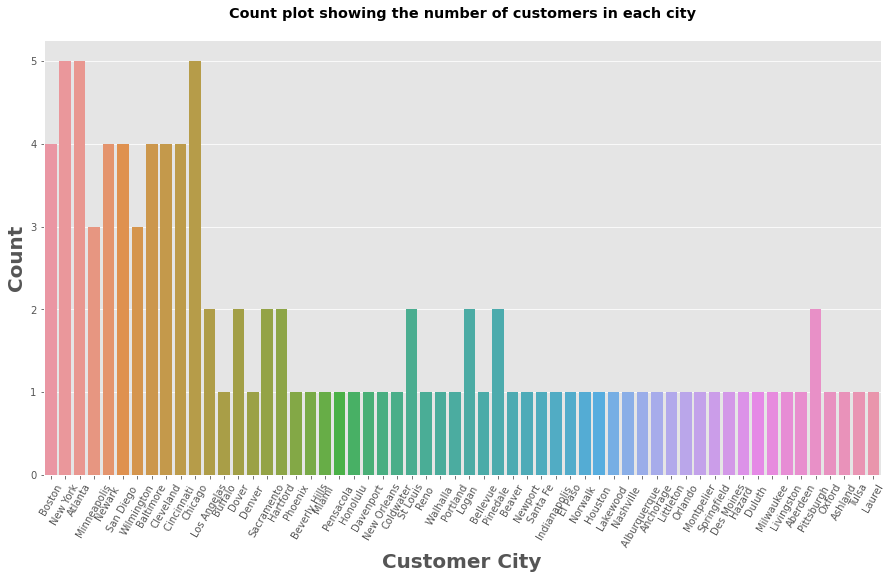

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
sns.countplot(customer_and_sales['Customer City'])
plt.title("Count plot showing the number of customers in each city\n",fontweight="bold")
plt.xlabel("Customer City",fontsize=20,fontweight="bold")
plt.ylabel("Count",fontsize=20,fontweight="bold")
plt.xticks(rotation=60)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


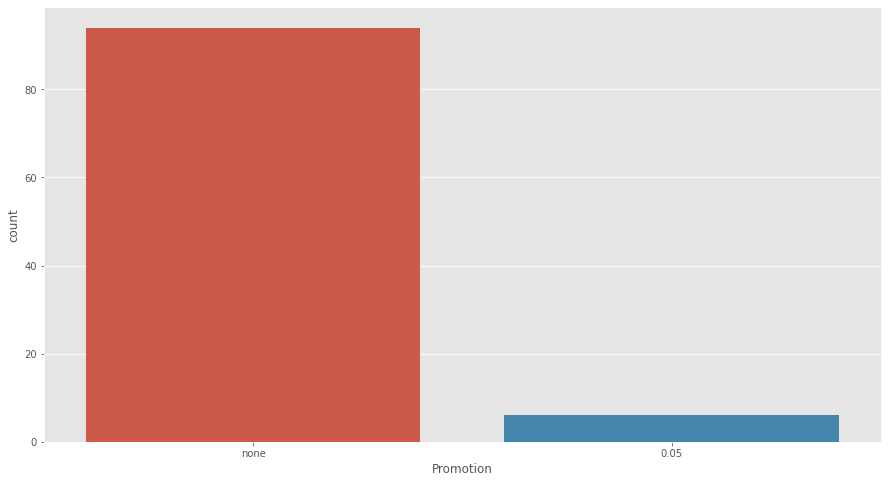

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(customer_and_sales['Promotion'])

Only two cities namely Chicago and New York has 5 customers. Most of the city have 2 customers. Policies such as promotion and ads needs to be increased on large scale. Promotion is not given to the maximum customers products. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


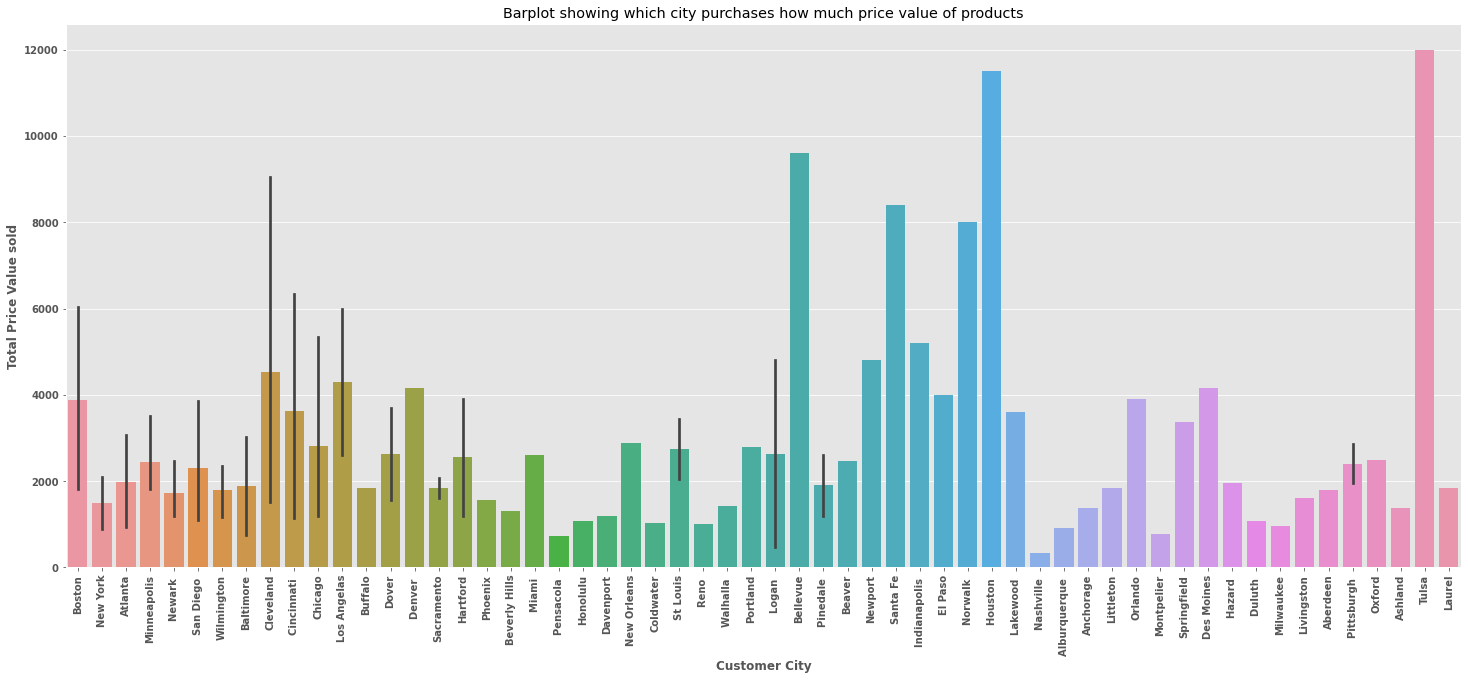

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(25,10))
sns.barplot(customer_and_sales['Customer City'],customer_and_sales['Total Price'])
plt.title("Barplot showing which city purchases how much price value of products")
plt.xlabel("Customer City",fontweight='bold')
plt.ylabel("Total Price Value sold",fontweight='bold')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

From the graph we see that customers from most of the cities purchase goods worth below 2000. Few cities have higher sales.

>> ## **merging employee and payroll over "Employee ID"**

In [ ]:
employee_and_payroll=pd.merge(employee,payroll,on='Employee ID')
employee_and_payroll.head(2)

,Employee ID,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Hourly Amount,Type,Pay Frequency,Bonus,Pay Type,Date of Payment,Employee Type,Hours Worked,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
0,728212,2012-07-18,100,Sales Representative,D,2012-10-16,D,2012-09-16,70000.0,NaN,Salary,1st and 15th,0.1,1st and 15th,2017-03-01,Salary,NaN,2916.666667,400,58.333333,291.666667,7000.0,9166.666667
1,530855,2005-02-08,100,Human Resources Director,C,2005-05-09,B,2005-04-09,140000.0,NaN,Salary,1st and 15th,0.2,1st and 15th,2017-03-01,Salary,NaN,5833.333333,800,233.333333,583.333333,28000.0,32216.666667


In [ ]:
employee_and_payroll.drop(['Employee ID','Pay Frequency'],axis=1,inplace=True)

In [ ]:
employee_and_payroll.shape

(100, 21)

In [ ]:
employee_and_payroll.head(2)

,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Hourly Amount,Type,Bonus,Pay Type,Date of Payment,Employee Type,Hours Worked,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
0,2012-07-18,100,Sales Representative,D,2012-10-16,D,2012-09-16,70000.0,NaN,Salary,0.1,1st and 15th,2017-03-01,Salary,NaN,2916.666667,400,58.333333,291.666667,7000.0,9166.666667
1,2005-02-08,100,Human Resources Director,C,2005-05-09,B,2005-04-09,140000.0,NaN,Salary,0.2,1st and 15th,2017-03-01,Salary,NaN,5833.333333,800,233.333333,583.333333,28000.0,32216.666667


In [ ]:
employee_and_payroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Hire Date           100 non-null    datetime64[ns]
 1   Location ID         100 non-null    int64         
 2   Job Title           100 non-null    object        
 3   Medical Plan        100 non-null    object        
 4   Medical Start Date  100 non-null    datetime64[ns]
 5   Savings Plan        100 non-null    object        
 6   Savings Start Date  100 non-null    datetime64[ns]
 7   Salary Amount       41 non-null     float64       
 8   Hourly Amount       59 non-null     float64       
 9   Type                100 non-null    object        
 10  Bonus               100 non-null    object        
 11  Pay Type            100 non-null    object        
 12  Date of Payment     100 non-null    datetime64[ns]
 13  Employee Type       100 non-null    object        


In [ ]:
employee_and_payroll=employee_and_payroll.fillna(0)

In [ ]:
employee_and_payroll['Bonus'].value_counts()

no     77
0.1    16
0.2     7
Name: Bonus, dtype: int64

In [ ]:
employee_and_payroll['Bonus']=employee_and_payroll['Bonus'].replace("no",0)

# **Separating Salaried and hourly employees**

In [ ]:
salaried_employees=employee_and_payroll[employee_and_payroll['Employee Type']=="Salary"]
hourly_employees=employee_and_payroll[employee_and_payroll['Employee Type']=="Hourly"]

In [ ]:
salaried_employees.head(2)

,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Hourly Amount,Type,Bonus,Pay Type,Date of Payment,Employee Type,Hours Worked,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
0,2012-07-18,100,Sales Representative,D,2012-10-16,D,2012-09-16,70000.0,0.0,Salary,0.1,1st and 15th,2017-03-01,Salary,0.0,2916.666667,400,58.333333,291.666667,7000.0,9166.666667
1,2005-02-08,100,Human Resources Director,C,2005-05-09,B,2005-04-09,140000.0,0.0,Salary,0.2,1st and 15th,2017-03-01,Salary,0.0,5833.333333,800,233.333333,583.333333,28000.0,32216.666667


In [ ]:
salaried_employees.drop(['Hourly Amount','Employee Type','Hours Worked'],axis=1,inplace=True)
salaried_employees.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Type,Bonus,Pay Type,Date of Payment,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
0,2012-07-18,100,Sales Representative,D,2012-10-16,D,2012-09-16,70000.0,Salary,0.1,1st and 15th,2017-03-01,2916.666667,400,58.333333,291.666667,7000.0,9166.666667
1,2005-02-08,100,Human Resources Director,C,2005-05-09,B,2005-04-09,140000.0,Salary,0.2,1st and 15th,2017-03-01,5833.333333,800,233.333333,583.333333,28000.0,32216.666667


In [ ]:
hourly_employees.head(2)

,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Hourly Amount,Type,Bonus,Pay Type,Date of Payment,Employee Type,Hours Worked,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
4,2012-05-06,100,Executive Assistant,B,2012-08-04,C,2012-07-05,0.0,17.0,Hourly,0.0,bi-weekly,2017-03-01,Hourly,80.0,1360.0,200,40.8,136.0,0.0,983.2
17,2014-01-21,200,Line Operator,E,2014-04-21,D,2014-03-22,0.0,12.0,Hourly,0.0,bi-weekly,2017-03-01,Hourly,80.0,960.0,100,19.2,96.0,0.0,744.8


In [ ]:
hourly_employees.drop(['Salary Amount','Bonus','Employee Type','Year End Bonus'],axis=1,inplace=True)
hourly_employees.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Hourly Amount,Type,Pay Type,Date of Payment,Hours Worked,Pay,Medical,Savings,Tax (10%),Total Pay
4,2012-05-06,100,Executive Assistant,B,2012-08-04,C,2012-07-05,17.0,Hourly,bi-weekly,2017-03-01,80.0,1360.0,200,40.8,136.0,983.2
17,2014-01-21,200,Line Operator,E,2014-04-21,D,2014-03-22,12.0,Hourly,bi-weekly,2017-03-01,80.0,960.0,100,19.2,96.0,744.8


# **What the problem seems?**

**In case of Hourly employees, total pay should be the Pay(Hours*Hourly_Amount)-medical-saving-tax. This seems fine.** 

**But lets observe the salaried employees.**
**Observing closely we observe that the year end bonus which should be paid ones in a year, sums up with every salary(Twice a month.)**

**Let's correct this.**

In [ ]:
salaried_employees.head(2)

,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Type,Bonus,Pay Type,Date of Payment,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
0,2012-07-18,100,Sales Representative,D,2012-10-16,D,2012-09-16,70000.0,Salary,0.1,1st and 15th,2017-03-01,2916.666667,400,58.333333,291.666667,7000.0,9166.666667
1,2005-02-08,100,Human Resources Director,C,2005-05-09,B,2005-04-09,140000.0,Salary,0.2,1st and 15th,2017-03-01,5833.333333,800,233.333333,583.333333,28000.0,32216.666667


In [ ]:
salaried_employees['new_calc_total_pay']=(salaried_employees['Pay']-salaried_employees['Medical']-salaried_employees['Tax (10%)']-salaried_employees['Savings'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
salaried_employees.head(2)

,Hire Date,Location ID,Job Title,Medical Plan,Medical Start Date,Savings Plan,Savings Start Date,Salary Amount,Type,Bonus,Pay Type,Date of Payment,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay,new_calc_total_pay
0,2012-07-18,100,Sales Representative,D,2012-10-16,D,2012-09-16,70000.0,Salary,0.1,1st and 15th,2017-03-01,2916.666667,400,58.333333,291.666667,7000.0,9166.666667,2166.666667
1,2005-02-08,100,Human Resources Director,C,2005-05-09,B,2005-04-09,140000.0,Salary,0.2,1st and 15th,2017-03-01,5833.333333,800,233.333333,583.333333,28000.0,32216.666667,4216.666667


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

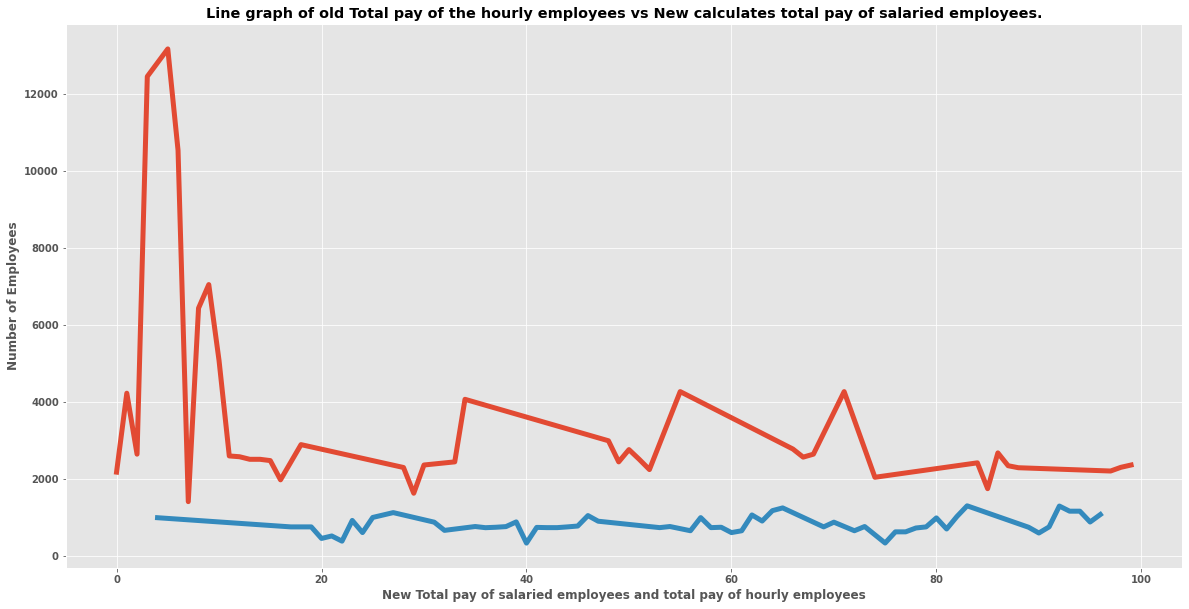

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(salaried_employees['new_calc_total_pay'],linewidth=5)
plt.plot(hourly_employees['Total Pay'],linewidth=5)
plt.title("Line graph of old Total pay of the hourly employees vs New calculates total pay of salaried employees.", fontweight='bold')
plt.xlabel("New Total pay of salaried employees and total pay of hourly employees",fontweight='bold')
plt.ylabel("Number of Employees",fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

**We observe that the hourly employees are always paid less than the salaried employees.
Now let's compare the new calculated total pay with the old ones of the salaried employees.**

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text major ticklabel objects>)

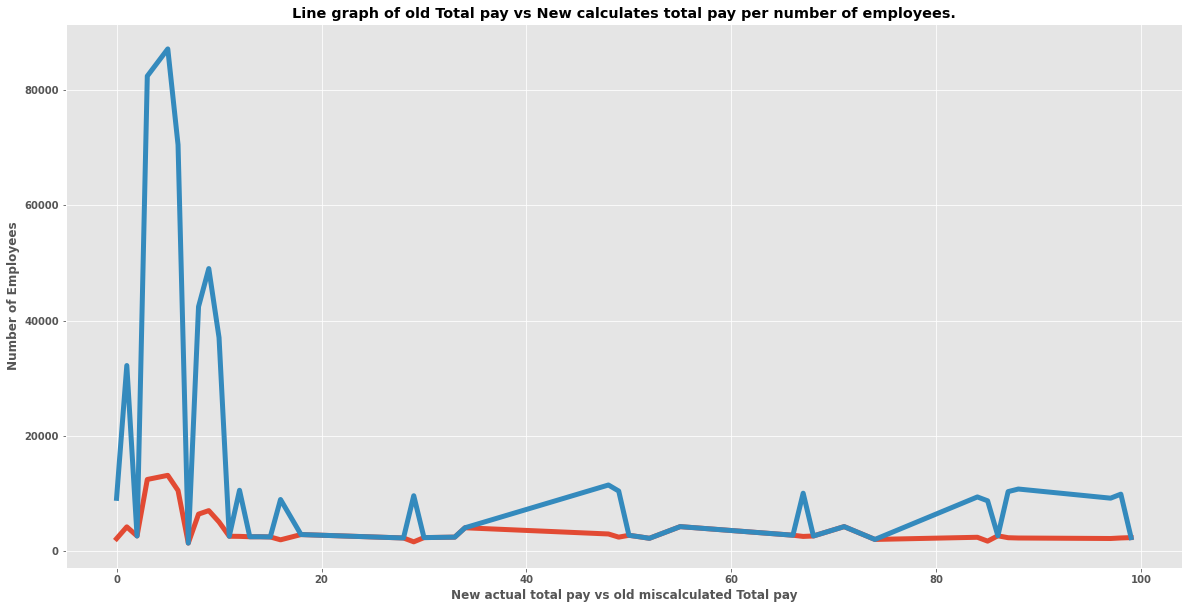

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(salaried_employees['new_calc_total_pay'],linewidth=5)
plt.plot(salaried_employees['Total Pay'],linewidth=5)
plt.title("Line graph of old Total pay vs New calculates total pay per number of employees.", fontweight='bold')
plt.xlabel("New actual total pay vs old miscalculated Total pay",fontweight='bold')
plt.ylabel("Number of Employees",fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

**At some places Total pay old was extremely higher than the actual one because of end year bonus inclusion in regular pay.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


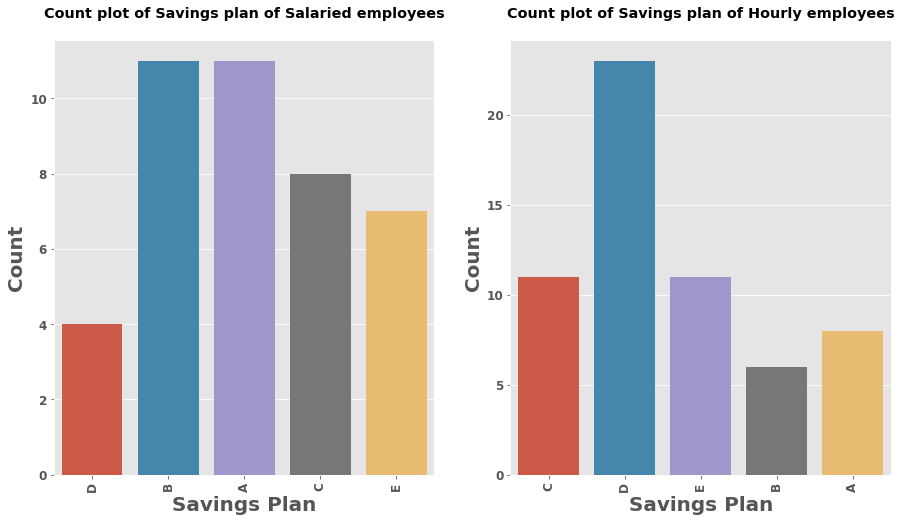

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
plt.style.use('ggplot')
sns.countplot(salaried_employees['Savings Plan'],ax=ax[0])
ax[0].set_title("Count plot of Savings plan of Salaried employees\n",fontweight="bold")
ax[0].set_xlabel("Savings Plan",fontsize=20,fontweight="bold")
ax[0].set_ylabel("Count",fontsize=20,fontweight="bold")
plt.setp(ax[0].get_xticklabels(),rotation="vertical",fontsize=12,fontweight='bold')
plt.setp(ax[0].get_yticklabels(),fontsize=12,fontweight='bold')


sns.countplot(hourly_employees['Savings Plan'],ax=ax[1])
ax[1].set_title("Count plot of Savings plan of Hourly employees\n",fontweight="bold")
ax[1].set_xlabel("Savings Plan",fontsize=20,fontweight="bold")
ax[1].set_ylabel("Count",fontsize=20,fontweight="bold")
plt.setp(ax[1].get_xticklabels(),rotation="vertical",fontsize=12,fontweight='bold')
plt.setp(ax[1].get_yticklabels(),fontsize=12,fontweight='bold')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

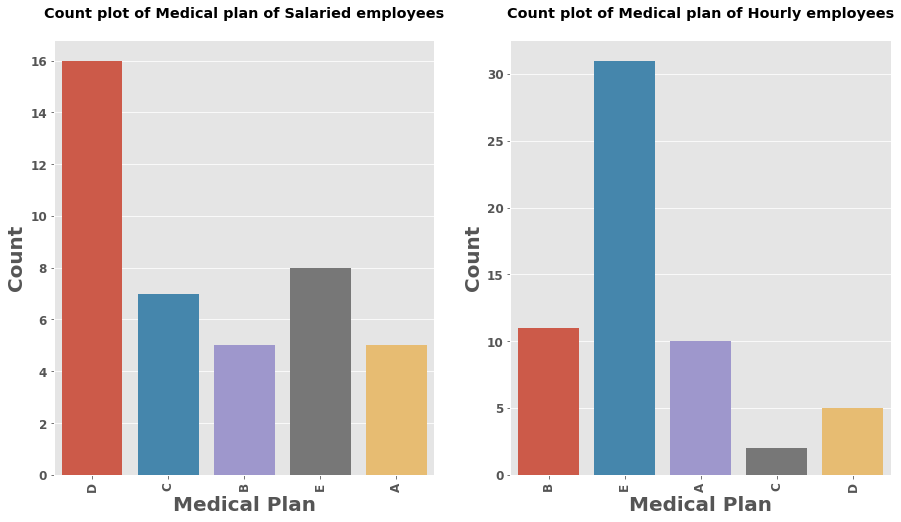

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
plt.style.use('ggplot')
sns.countplot(salaried_employees['Medical Plan'],ax=ax[0])
sns.countplot(salaried_employees['Medical Plan'],ax=ax[0])
ax[0].set_title("Count plot of Medical plan of Salaried employees\n",fontweight="bold")
ax[0].set_xlabel("Medical Plan",fontsize=20,fontweight="bold")
ax[0].set_ylabel("Count",fontsize=20,fontweight="bold")
plt.setp(ax[0].get_xticklabels(),rotation="vertical",fontsize=12,fontweight='bold')
plt.setp(ax[0].get_yticklabels(),fontsize=12,fontweight='bold')


sns.countplot(hourly_employees['Medical Plan'],ax=ax[1])
sns.countplot(hourly_employees['Medical Plan'],ax=ax[1])
ax[1].set_title("Count plot of Medical plan of Hourly employees\n",fontweight="bold")
ax[1].set_xlabel("Medical Plan",fontsize=20,fontweight="bold")
ax[1].set_ylabel("Count",fontsize=20,fontweight="bold")
plt.setp(ax[1].get_xticklabels(),rotation="vertical",fontsize=12,fontweight='bold')
plt.setp(ax[1].get_yticklabels(),fontsize=12,fontweight='bold')

plt.show()

# **Lets deal with the vendor problem as mentioned in the question.**

In [ ]:
invoice.head(1)

,Invoice #,Vendor #,Item,Item Quantity,Item Cost,Extended Cost,Freight Cost,Total Cost,Processor ID,PO #,Associated Receipt,Payment Terms,Discount
0,74562,321782506,131,100,15,1500,200,1700,feng42,323205,774805,Net 60,none


In [ ]:
payment.head(1)

,Payment ID,Vendor,PO #,Receipt #,Invoice #,Payment Amount,Payment Type,Payment Date,Processor ID
0,65405,321782506,323205.0,774805,74562,1700,Check,2017-03-18,feng42


In [ ]:
receipt.head(1)

,Receipt ID,Location ID,Date,Time,Item #,Item Quantity,Truck #,Receiver ID,Vendor #,PO #
0,774805,200,2017-03-15,09:04,131,100,1030,young68,321782506,323205


In [ ]:
purchase_order.head(1)

,PO #,Location ID,Item,Description,Item Quantity,Unit Cost,Total Amount,Vendor #,Creator ID,Creation Date,Creation Time,Approver ID,Approver Date,Approver Time
0,323205,200,131,Toy Car Wheels,100,15,1500,321782506,gutierrez39,2017-03-08,05:50:00,young68,2017-03-09,04:05:00


In [ ]:
matching_total_payment=pd.merge(payment[['PO #','Vendor','Payment Amount']],invoice[['Total Cost','PO #']],on=['PO #'])

In [ ]:
matching_total_payment.head()

,PO #,Vendor,Payment Amount,Total Cost
0,323205.0,321782506,1700,1700
1,405605.0,658314729,850,850
2,795652.0,504796147,850,850
3,749207.0,640498345,4400,4400
4,998053.0,114058620,6600,6600


In [ ]:
matching_total_payment['Amount Difference']=matching_total_payment['Payment Amount']-matching_total_payment['Total Cost']

In [ ]:
matching_total_payment[matching_total_payment['Amount Difference']!=0]

,PO #,Vendor,Payment Amount,Total Cost,Amount Difference
20,891247.0,842895157,800,900,-100
25,506795.0,912086047,1000,1020,-20
38,355971.0,573426003,1500,1920,-420
56,621406.0,658314729,400,550,-150
71,409852.0,761344326,10700,10800,-100
97,650472.0,508089512,6000,9000,-3000


**In the question at least two inaccurate payments to key vendors have been identified by the AP manager. Here we have identified 6 wrong payments to different vendors. Let's have a look visually also**

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text major ticklabel objects>)

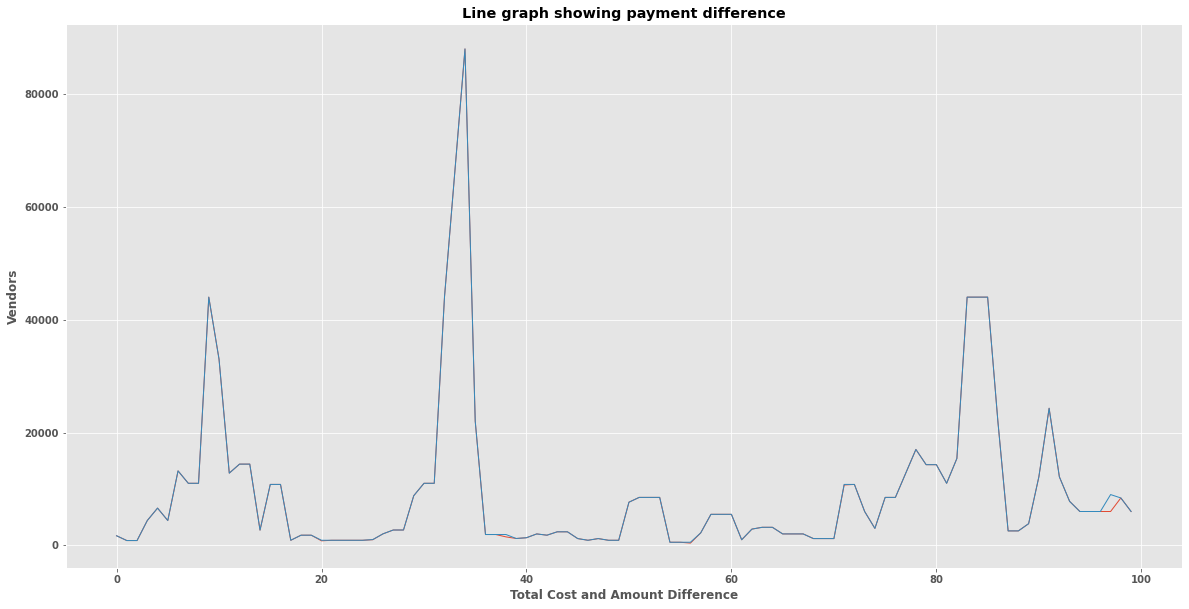

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(matching_total_payment['Payment Amount'],linewidth=1)
plt.plot(matching_total_payment['Total Cost'],linewidth=1)
plt.title("Line graph showing payment difference", fontweight='bold')
plt.xlabel("Total Cost and Amount Difference",fontweight='bold')
plt.ylabel("Vendors",fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

**As cleared from the graph we can observe, we see the difference at few places**

**Let's have a look at few other visuals**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

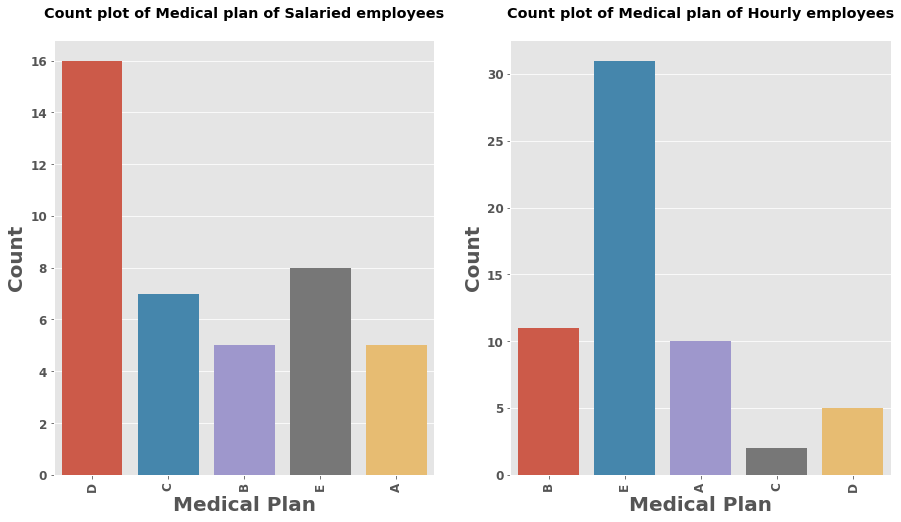

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
plt.style.use('ggplot')
sns.countplot(salaried_employees['Medical Plan'],ax=ax[0])
sns.countplot(salaried_employees['Medical Plan'],ax=ax[0])
ax[0].set_title("Count plot of Medical plan of Salaried employees\n",fontweight="bold")
ax[0].set_xlabel("Medical Plan",fontsize=20,fontweight="bold")
ax[0].set_ylabel("Count",fontsize=20,fontweight="bold")
plt.setp(ax[0].get_xticklabels(),rotation="vertical",fontsize=12,fontweight='bold')
plt.setp(ax[0].get_yticklabels(),fontsize=12,fontweight='bold')


sns.countplot(hourly_employees['Medical Plan'],ax=ax[1])
sns.countplot(hourly_employees['Medical Plan'],ax=ax[1])
ax[1].set_title("Count plot of Medical plan of Hourly employees\n",fontweight="bold")
ax[1].set_xlabel("Medical Plan",fontsize=20,fontweight="bold")
ax[1].set_ylabel("Count",fontsize=20,fontweight="bold")
plt.setp(ax[1].get_xticklabels(),rotation="vertical",fontsize=12,fontweight='bold')
plt.setp(ax[1].get_yticklabels(),fontsize=12,fontweight='bold')

plt.show()